# An Analysis on [Stop and Frisk](https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City)

#### By: Denton Paul


## Part 2 - kNN

In [22]:
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.formula.api as smf

In [29]:
frisk = pd.read_csv('./frisk.csv')
frisk = frisk.groupby(['precinct','eth']).agg({"popl":"mean", 'stops':'sum','past':'sum'}).reset_index('eth')

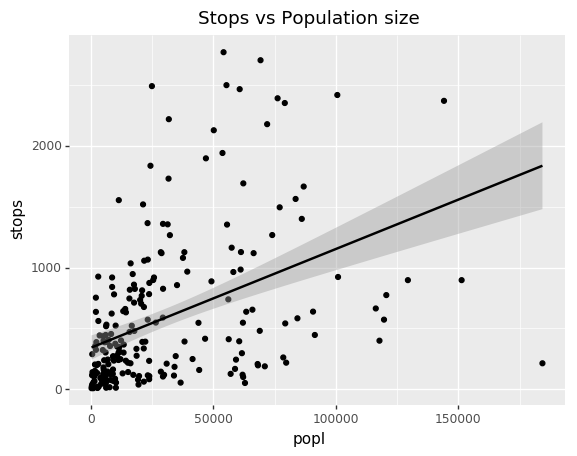

<ggplot: (-9223363278185307981)>

In [30]:
ggplot(frisk, aes(x='popl', y='stops')) + geom_point() + geom_smooth(method='lm') + \
ggtitle('Stops vs Population size')

We will repeat the above, but fitting a different line for each ethnicity.

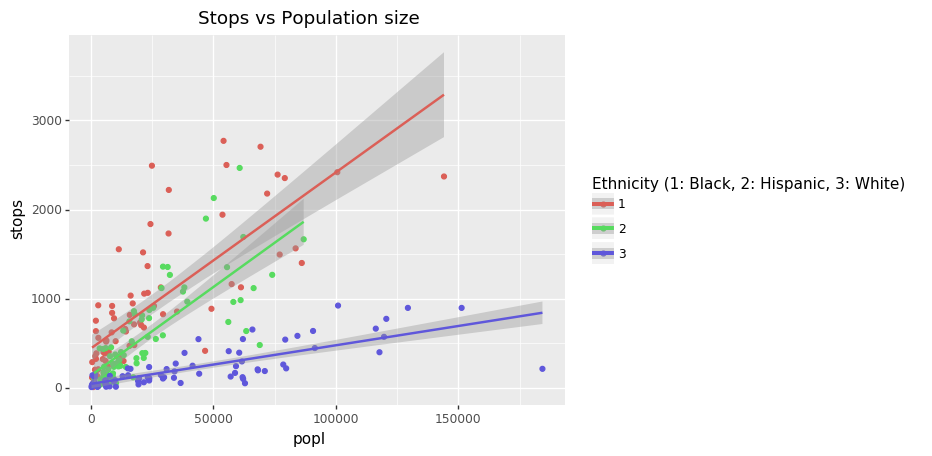

<ggplot: (-9223363278185249315)>

In [31]:
ggplot(frisk, aes(x='popl', y='stops', color='factor(eth)')) + geom_point() + geom_smooth(method='lm') + \
ggtitle('Stops vs Population size') + labs(color='Ethnicity (1: Black, 2: Hispanic, 3: White)')


__Note:__ A limitation of the default geom_smooth method is that is does not allow us to force the lines to pass through the origin. Luckily, we can pass our own smoothing function to geom_smooth.

The cell below gives the skeleton of how such a function should look. Its arguments are:
1. __data__: a dataframe of your original data with x and y columns,
2. __xseq__: a numpy array of values that ggplot will want predictions at
3. __**params__: miscellaneous parameters for ggplot, we don't have to worry about these. 

The function returns a dataframe again with 2 columns x and y. x will be xseq, and y will be the predicted values at xseq.

In [33]:
def ols_orig(data, xseq, **params):
                mod = smf.ols(formula='y~x-1', data=data)
                rslt = mod.fit()
                
                yseq = np.array(rslt.predict(data.x))
                
                data = pd.DataFrame({
                    'x': xseq,
                    'y': yseq
                })

                return data

Repeating the plot, we will now use the previous function in geom_smooth.

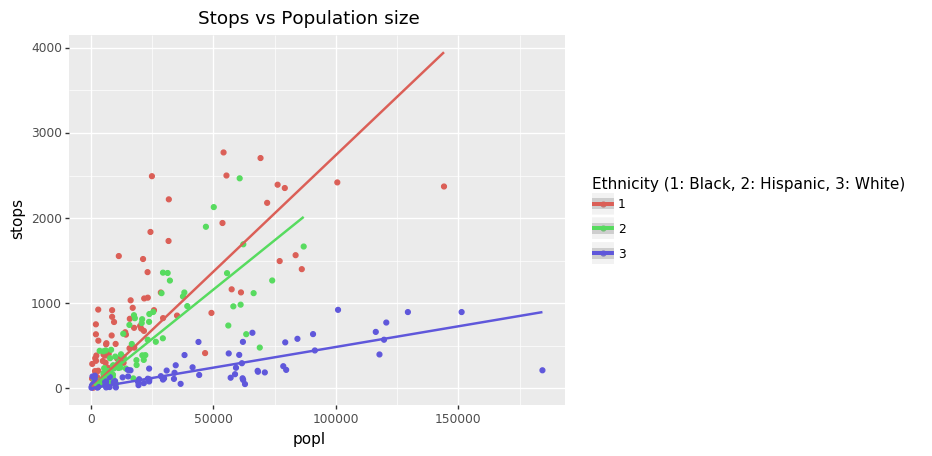

<ggplot: (-9223363278185280694)>

In [34]:
ggplot(frisk, aes(x='popl', y='stops', color='factor(eth)')) + geom_point() + \
geom_smooth(aes(x='popl', y='stops'), method=ols_orig) + \
ggtitle('Stops vs Population size') + labs(color='Ethnicity (1: Black, 2: Hispanic, 3: White)')

We will now run geom_smooth with k nearest neighbors.

In [36]:
def knn5(data,xseq,k=5,**params):
    k=5
    yseq = []
    for val in xseq:
        data['diff'] = data.apply(lambda row: abs(row.x-val), axis=1)
        yseq.append(data.nsmallest(k, 'diff').mean()['y'])

    data = pd.DataFrame({
                    'x': xseq,
                    'y': yseq
                })
    return data


def knn1(data,xseq,k=5,**params):
    k=1
    yseq = []
    for val in xseq:
        data['diff'] = data.apply(lambda row: abs(row.x-val), axis=1)
        yseq.append(data.nsmallest(k, 'diff').mean()['y'])

    data = pd.DataFrame({
                    'x': xseq,
                    'y': yseq
                })
    return data

def knn20(data,xseq,k=5,**params):
    k=20
    yseq = []
    for val in xseq:
        data['diff'] = data.apply(lambda row: abs(row.x-val), axis=1)
        yseq.append(data.nsmallest(k, 'diff').mean()['y'])

    data = pd.DataFrame({
                    'x': xseq,
                    'y': yseq
                })
    return data

We will now repeat part the plot again, using __knn5__ as the method used by geom_smooth.

### k=5

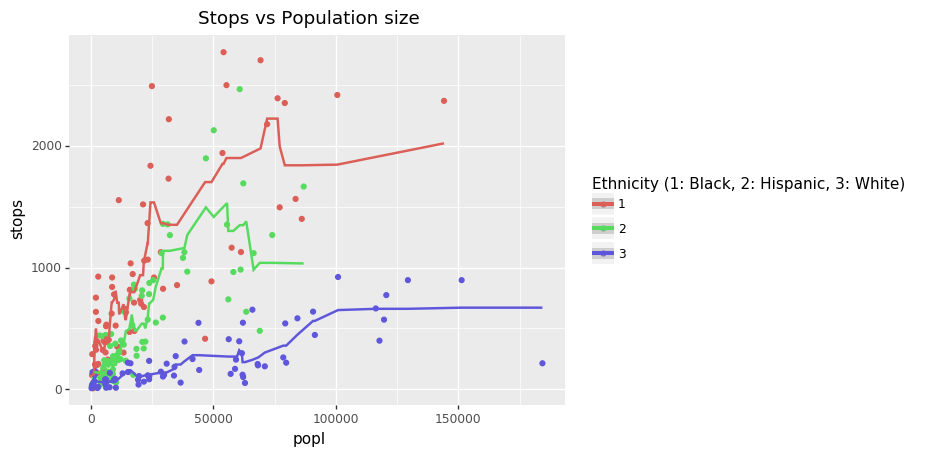

<ggplot: (8758670179192)>

In [37]:
ggplot(frisk, aes(x='popl', y='stops', color='factor(eth)')) + geom_point() + \
geom_smooth(aes(x='popl', y='stops'), method=knn5) + \
ggtitle('Stops vs Population size') + labs(color='Ethnicity (1: Black, 2: Hispanic, 3: White)')

We will repeat the above for k = 1 and k = 20.

### k=1

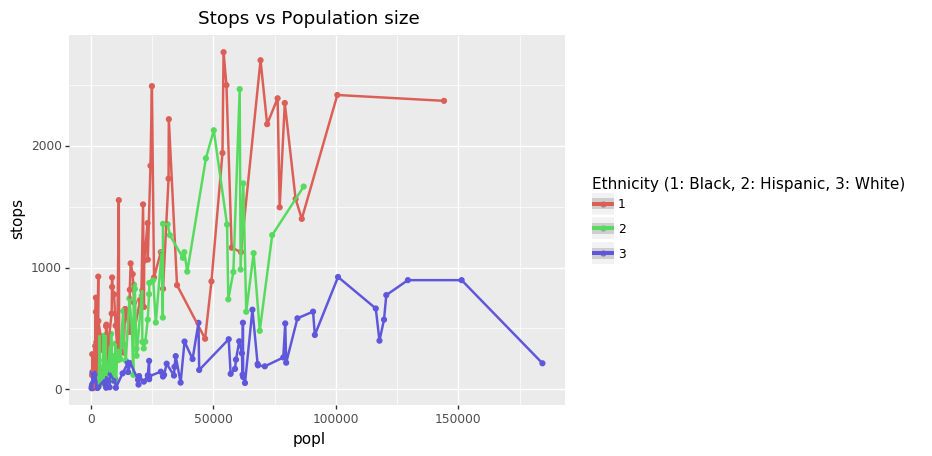

<ggplot: (8758663196585)>

In [38]:
ggplot(frisk, aes(x='popl', y='stops', color='factor(eth)')) + geom_point() + \
geom_smooth(aes(x='popl', y='stops'), method=knn1) + \
ggtitle('Stops vs Population size') + labs(color='Ethnicity (1: Black, 2: Hispanic, 3: White)')

### k=20

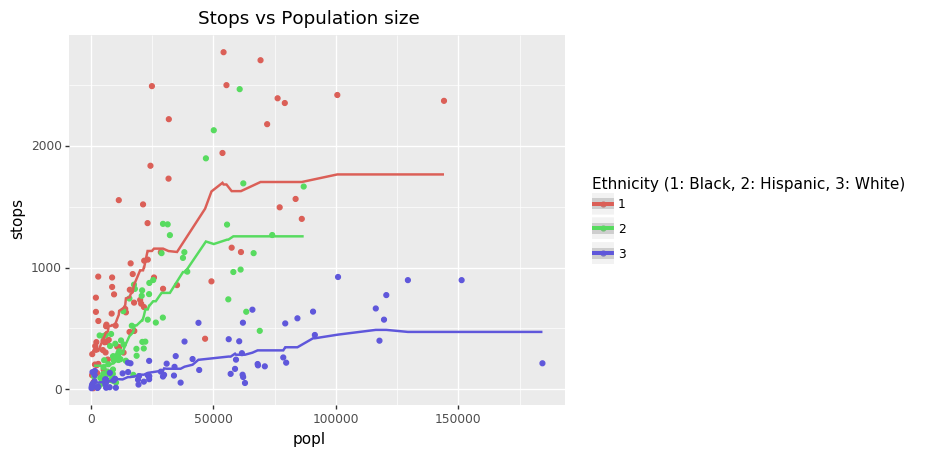

<ggplot: (8758663139269)>

In [39]:
ggplot(frisk, aes(x='popl', y='stops', color='factor(eth)')) + geom_point() + \
geom_smooth(aes(x='popl', y='stops'), method=knn20) + \
ggtitle('Stops vs Population size') + labs(color='Ethnicity (1: Black, 2: Hispanic, 3: White)')